# Stellium Chart Visualization Cookbook

This cookbook demonstrates all the ways to create beautiful natal chart visualizations with Stellium, from simple wheels to fully-featured charts with tables, multiple house systems, and custom styling.

**What you'll learn:**
- Creating basic chart wheels
- Applying themes and color palettes
- Adding info corners (chart info, moon phase, aspect counts)
- Displaying multiple house systems
- Adding position tables and aspectarians
- Creating professional, publication-ready charts

All charts are saved to `examples/charts/` and displayed inline.

In [1]:
# Setup: Import required modules and create output directory
from pathlib import Path

from IPython.display import SVG, display

from stellium import ChartBuilder
from stellium.engines import KochHouses, PlacidusHouses, WholeSignHouses

# Output directory for generated charts
OUTPUT_DIR = Path("charts")
OUTPUT_DIR.mkdir(exist_ok=True)

print(f"Charts will be saved to: {OUTPUT_DIR.absolute()}")

Charts will be saved to: /Users/katelouie/code/stellium/examples/charts


---

## Part 1: Basic Charts

Let's start with the simplest possible chart and build from there.

### Example 1: The Simplest Possible Chart

Just call `.draw()` and `.save()` - that's it! We use `from_notable()` to load a celebrity's birth data from Stellium's built-in database.

Saved: charts/01_simplest.svg


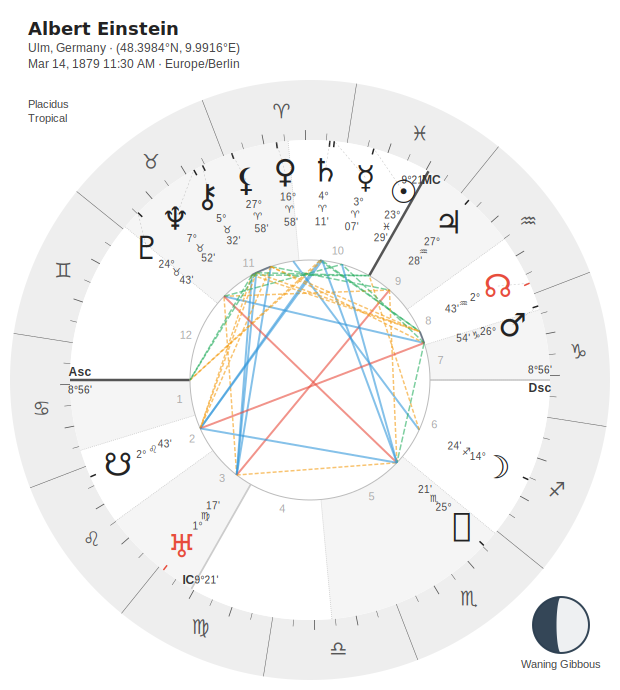

In [2]:
chart = ChartBuilder.from_notable("Albert Einstein").with_aspects().calculate()

output = OUTPUT_DIR / "01_simplest.svg"
chart.draw(str(output)).save()

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 2: Custom Size

Specify the chart size in pixels using `.with_size()`. This is useful for thumbnails or large prints.

Saved: charts/02_small.svg (400px)


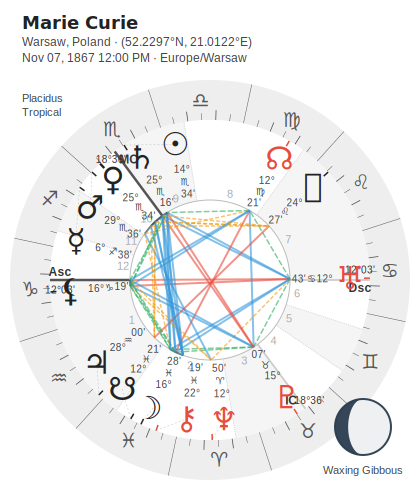

In [3]:
chart = ChartBuilder.from_notable("Marie Curie").with_aspects().calculate()

# Small chart (400px)
output = OUTPUT_DIR / "02_small.svg"
chart.draw(str(output)).with_size(400).save()

print(f"Saved: {output} (400px)")
SVG(filename=str(output))

Saved: charts/02_large.svg (900px)


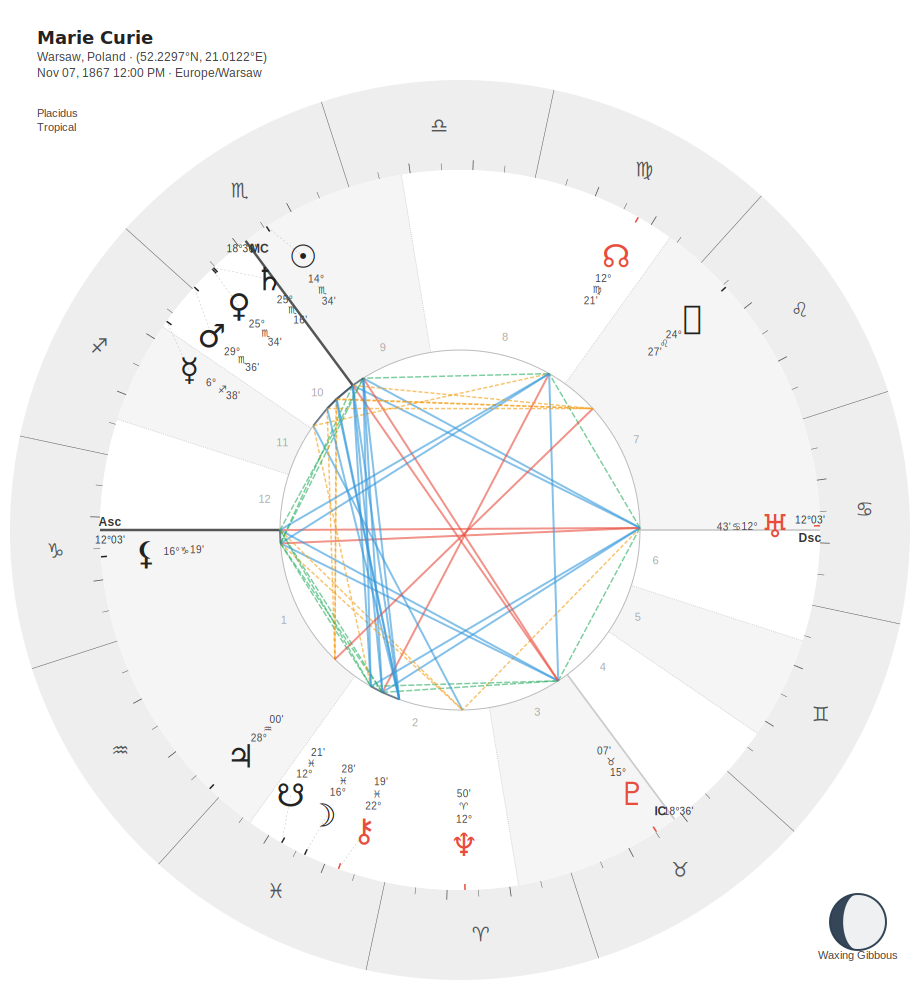

In [4]:
# Large chart (900px)
output = OUTPUT_DIR / "02_large.svg"
chart.draw(str(output)).with_size(900).save()

print(f"Saved: {output} (900px)")
SVG(filename=str(output))

### Example 3: Using Presets

Presets bundle common configurations for quick setup:

- **`preset_minimal()`** - Just the wheel, no extras
- **`preset_standard()`** - Wheel + info corners
- **`preset_detailed()`** - Everything including tables

Saved: charts/03_preset_minimal.svg


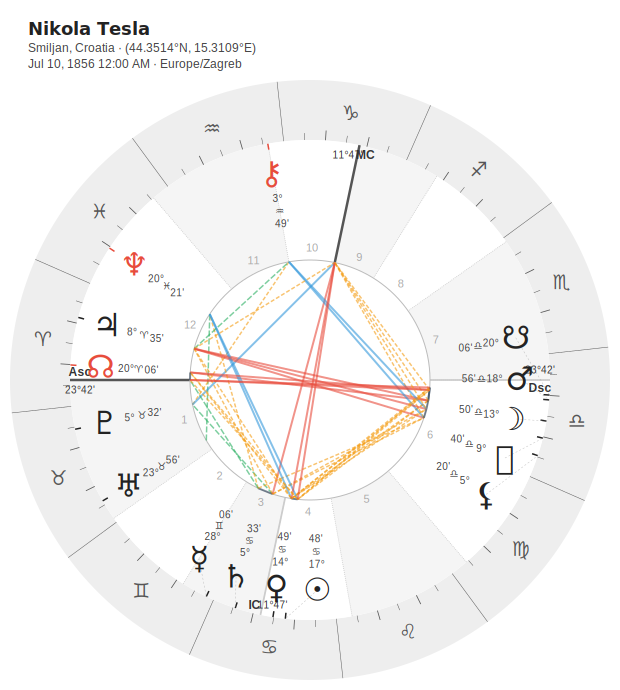

In [5]:
chart = ChartBuilder.from_notable("Nikola Tesla").with_aspects().calculate()

# Minimal preset - just the wheel
output = OUTPUT_DIR / "03_preset_minimal.svg"
chart.draw(str(output)).preset_minimal().save()

print(f"Saved: {output}")
SVG(filename=str(output))

Saved: charts/03_preset_standard.svg


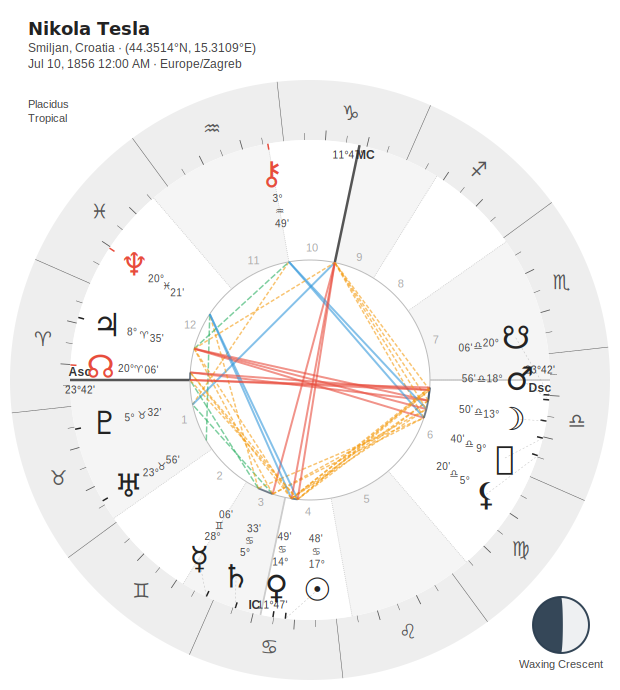

In [6]:
# Standard preset - wheel + info corners
output = OUTPUT_DIR / "03_preset_standard.svg"
chart.draw(str(output)).preset_standard().save()

print(f"Saved: {output}")
SVG(filename=str(output))

Saved: charts/03_preset_detailed.svg


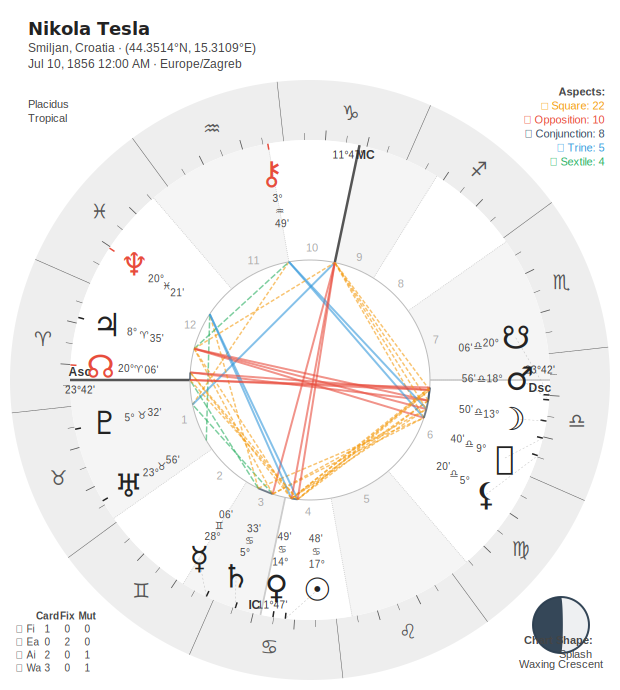

In [7]:
# Detailed preset - everything including tables
output = OUTPUT_DIR / "03_preset_detailed.svg"
chart.draw(str(output)).preset_detailed().save()

print(f"Saved: {output}")
SVG(filename=str(output))

---

## Part 2: Themes

Themes control the overall color scheme of your chart. Stellium includes both artistic themes and scientific colormap themes.

### Example 4: Visual Themes

Available themes: `classic`, `dark`, `midnight`, `celestial`, `neon`, `sepia`, `pastel`

Theme: classic


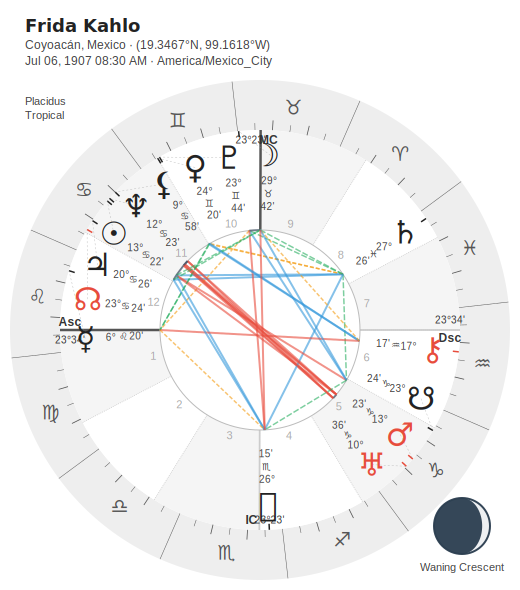

Theme: dark


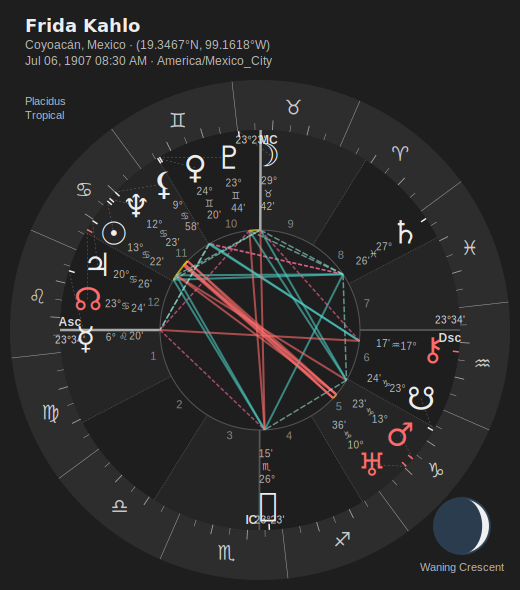

Theme: midnight


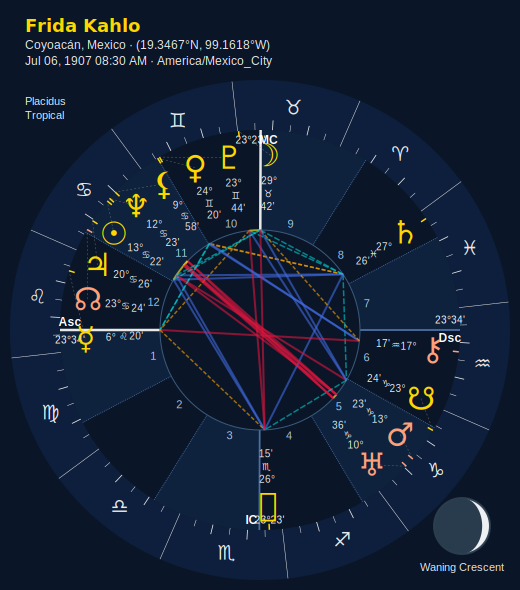

Theme: celestial


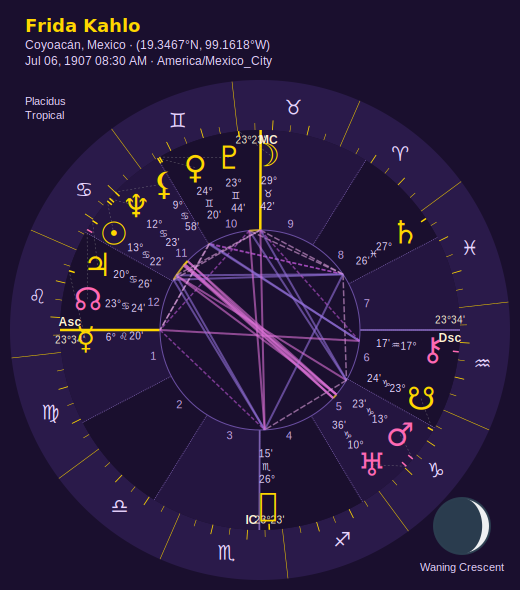

In [8]:
chart = ChartBuilder.from_notable("Frida Kahlo").with_aspects().calculate()

themes = ["classic", "dark", "midnight", "celestial"]

for theme in themes:
    output = OUTPUT_DIR / f"04_theme_{theme}.svg"
    chart.draw(str(output)).with_theme(theme).with_size(500).save()

    print(f"Theme: {theme}")
    display(SVG(filename=str(output)))

Theme: neon


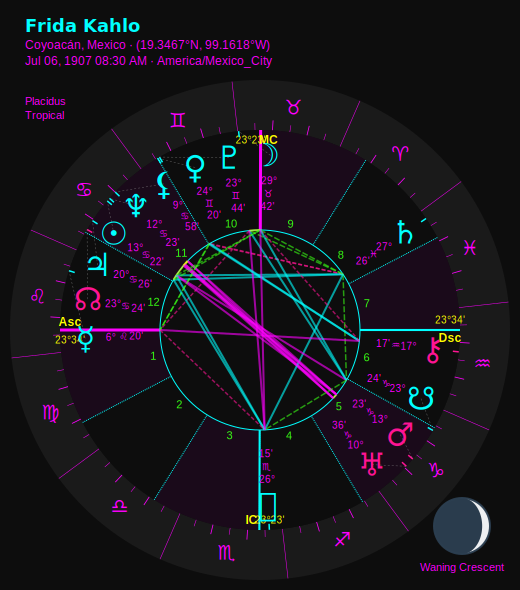

Theme: sepia


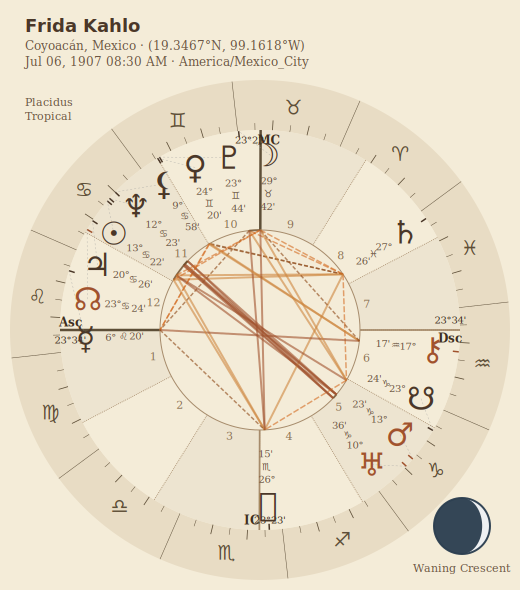

Theme: pastel


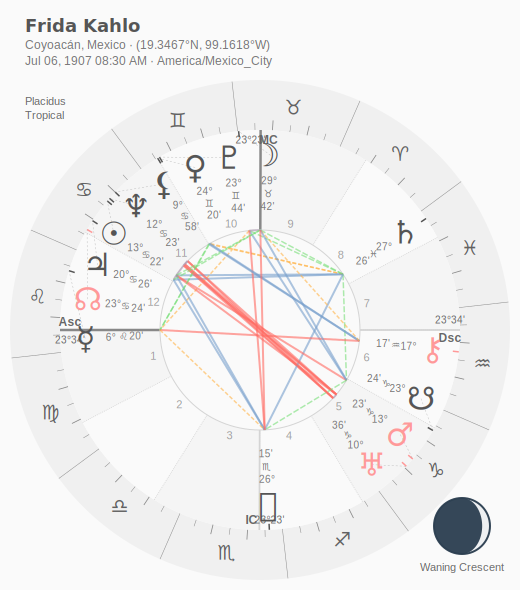

In [9]:
# More themes
for theme in ["neon", "sepia", "pastel"]:
    output = OUTPUT_DIR / f"04_theme_{theme}.svg"
    chart.draw(str(output)).with_theme(theme).with_size(500).save()

    print(f"Theme: {theme}")
    display(SVG(filename=str(output)))

### Example 5: Scientific Colormap Themes

Themes based on matplotlib's perceptually uniform colormaps - great for accessibility and publications.

Theme: viridis


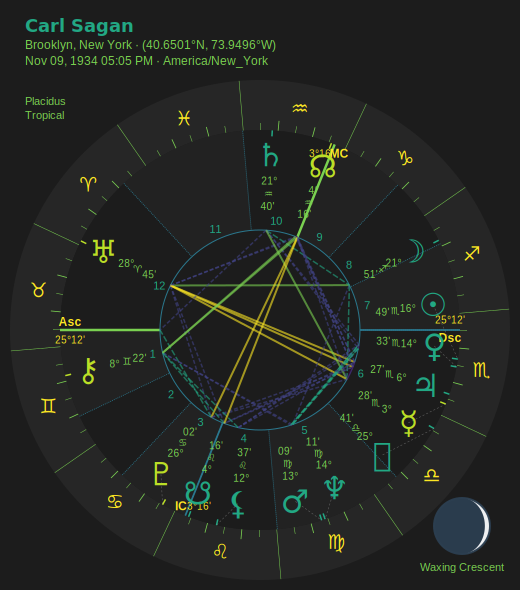

Theme: plasma


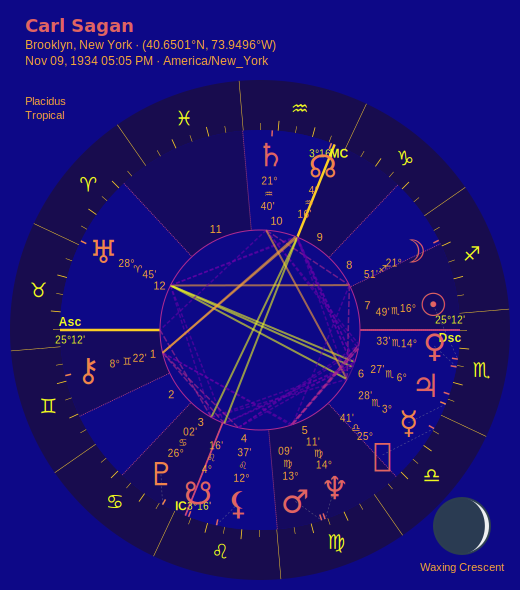

Theme: inferno


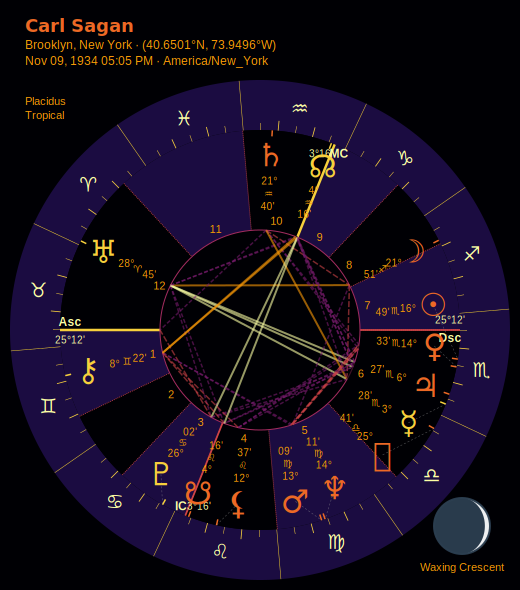

In [10]:
chart = ChartBuilder.from_notable("Carl Sagan").with_aspects().calculate()

for theme in ["viridis", "plasma", "inferno"]:
    output = OUTPUT_DIR / f"05_theme_{theme}.svg"
    chart.draw(str(output)).with_theme(theme).with_size(500).save()

    print(f"Theme: {theme}")
    display(SVG(filename=str(output)))

Theme: magma


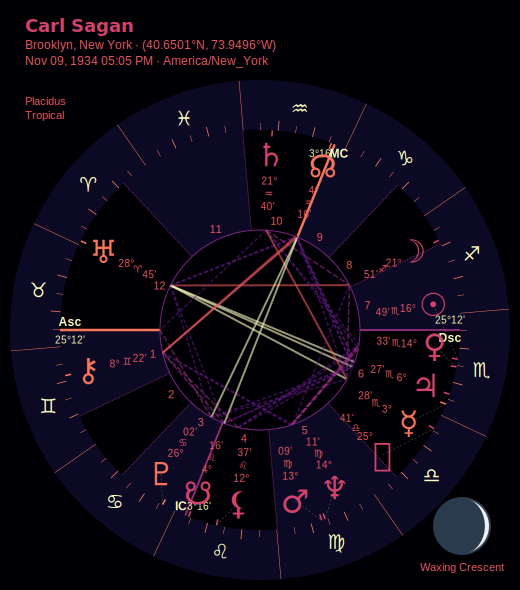

Theme: cividis


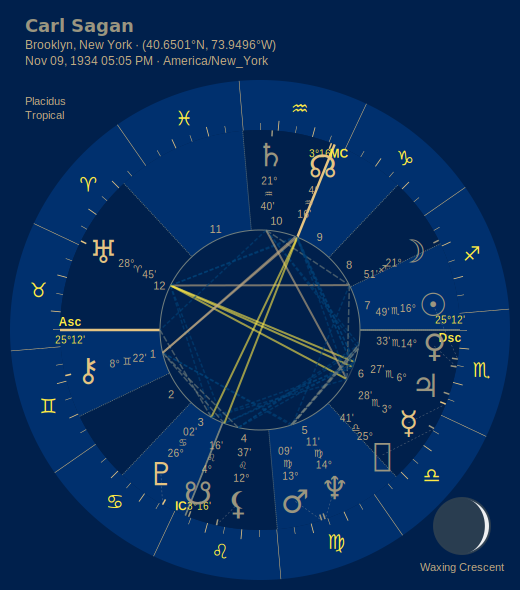

Theme: turbo


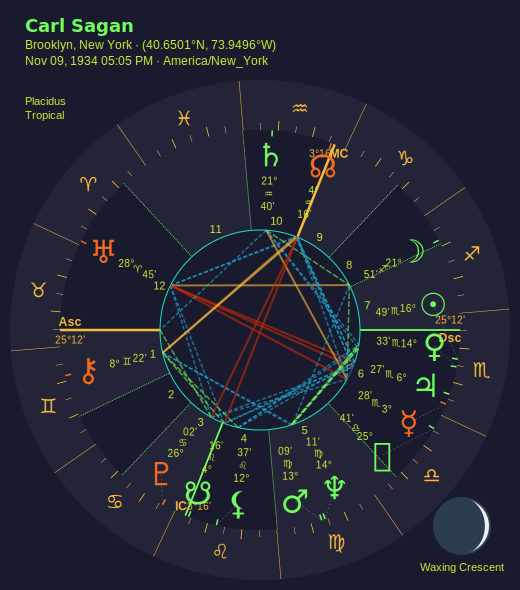

In [11]:
for theme in ["magma", "cividis", "turbo"]:
    output = OUTPUT_DIR / f"05_theme_{theme}.svg"
    chart.draw(str(output)).with_theme(theme).with_size(500).save()

    print(f"Theme: {theme}")
    display(SVG(filename=str(output)))

---

## Part 3: Zodiac Palettes

Control the colors of the zodiac signs in the outer ring, independent of the overall theme.

### Example 6: Zodiac Ring Palettes

Available palettes:
- **`grey`** - Monochrome, alternating shades
- **`rainbow`** - Classic rainbow colors
- **`elemental`** - Fire (red), Earth (green), Air (yellow), Water (blue)
- **`cardinality`** - Cardinal, Fixed, Mutable

Palette: grey



⚠️  Missing ephemeris file for Chiron (skipping)
   To download, run: stellium ephemeris download-asteroid 15
   Or manually download from: ast0/ folder


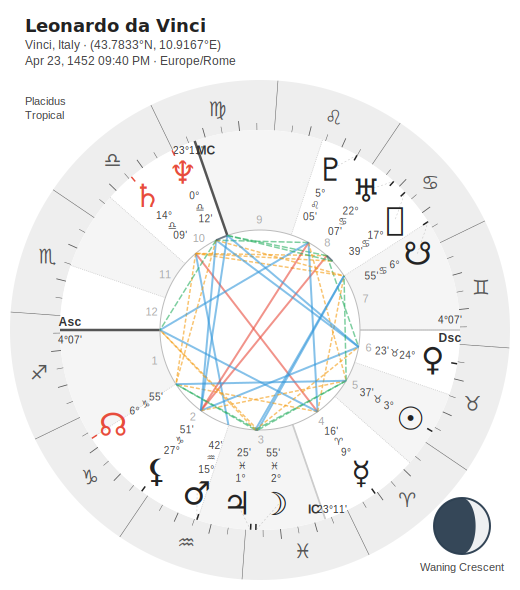

Palette: rainbow


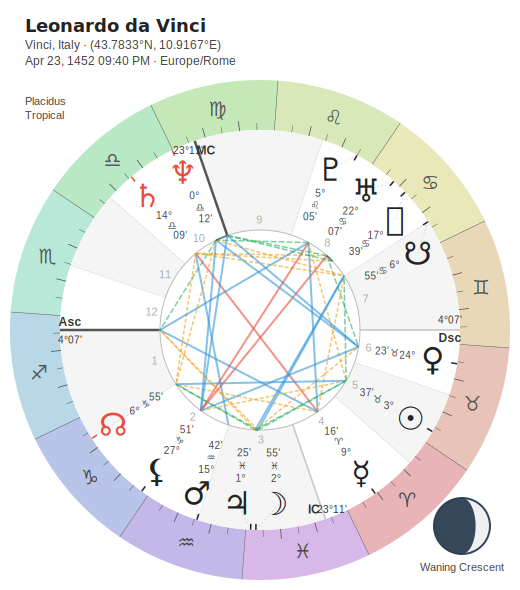

Palette: elemental


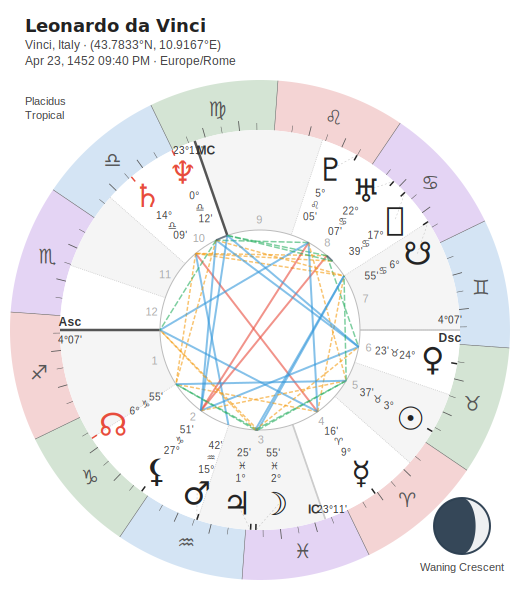

Palette: cardinality


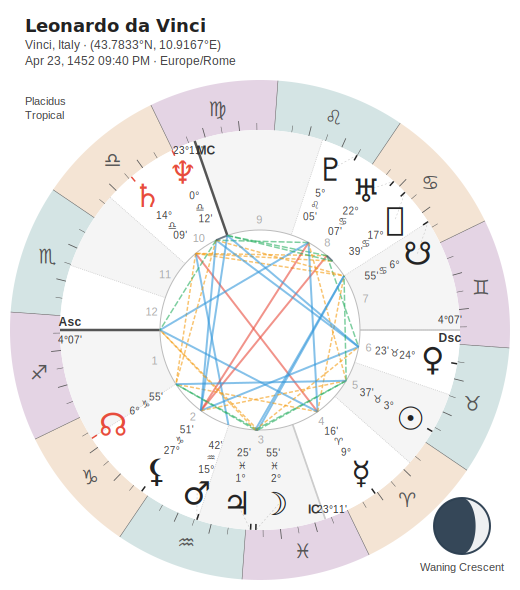

In [12]:
chart = ChartBuilder.from_notable("Leonardo da Vinci").with_aspects().calculate()

palettes = ["grey", "rainbow", "elemental", "cardinality"]

for palette in palettes:
    output = OUTPUT_DIR / f"06_palette_{palette}.svg"
    chart.draw(str(output)).with_zodiac_palette(palette).with_size(500).save()

    print(f"Palette: {palette}")
    display(SVG(filename=str(output)))

### Example 7: Theme-Matched Palettes

Each theme has a matching rainbow palette variant that's designed to look good together.

Theme: dark + Palette: rainbow_dark


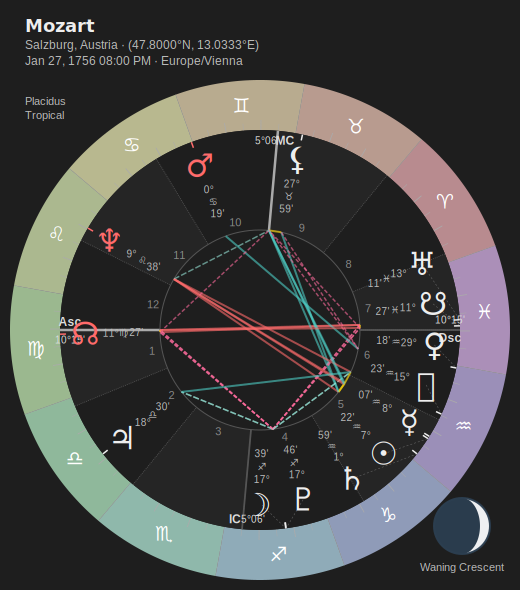

Theme: midnight + Palette: rainbow_midnight


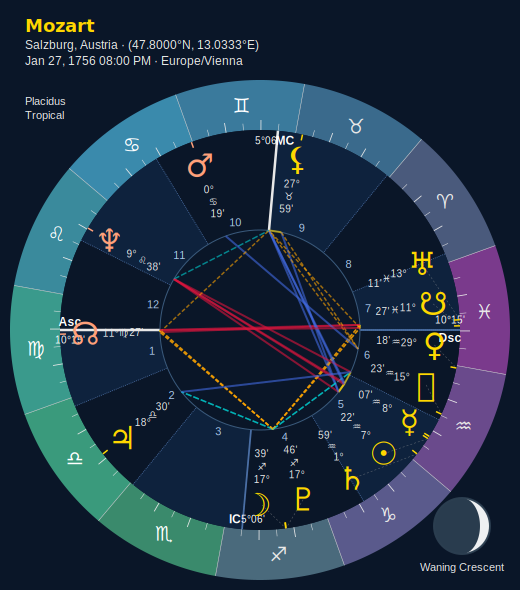

Theme: celestial + Palette: rainbow_celestial


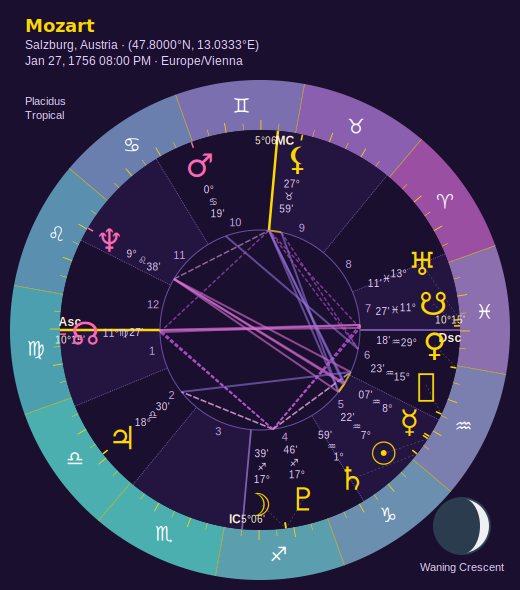

In [13]:
chart = ChartBuilder.from_notable("Mozart").with_aspects().calculate()

combos = [
    ("dark", "rainbow_dark"),
    ("midnight", "rainbow_midnight"),
    ("celestial", "rainbow_celestial"),
]

for theme, palette in combos:
    output = OUTPUT_DIR / f"07_{theme}_{palette}.svg"
    chart.draw(str(output)).with_theme(theme).with_zodiac_palette(palette).with_size(
        500
    ).save()

    print(f"Theme: {theme} + Palette: {palette}")
    display(SVG(filename=str(output)))

---

## Part 4: Info Corners

Add informational displays to the corners of your chart.

### Example 8: Chart Info Corner

Display birth data in a corner. Positions: `top-left`, `top-right`, `bottom-left`, `bottom-right`

Saved: charts/08_info_top_left.svg


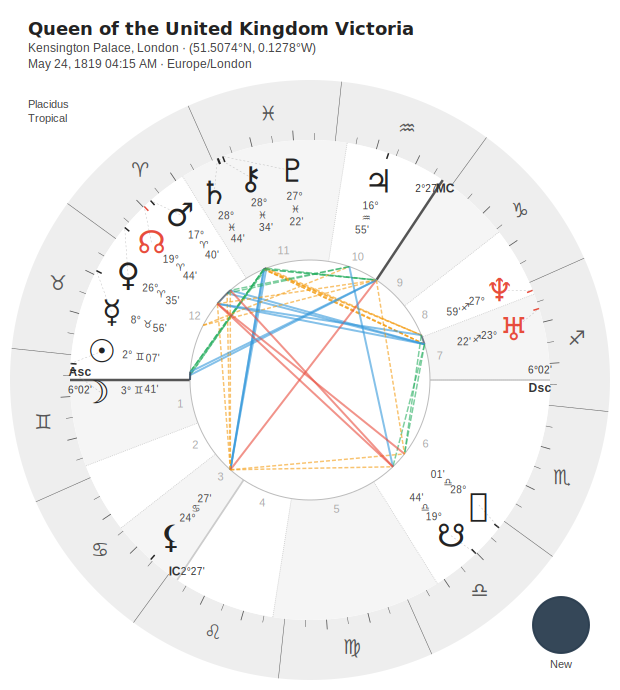

In [14]:
chart = (
    ChartBuilder.from_notable("Queen of the United Kingdom Victoria")
    .with_aspects()
    .calculate()
)

# Chart info in top-left corner
output = OUTPUT_DIR / "08_info_top_left.svg"
chart.draw(str(output)).with_chart_info(position="top-left").save()

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 9: Moon Phase Display

Show the moon phase at the time of the chart, with or without a text label.

Saved: charts/09_moon_labeled.svg


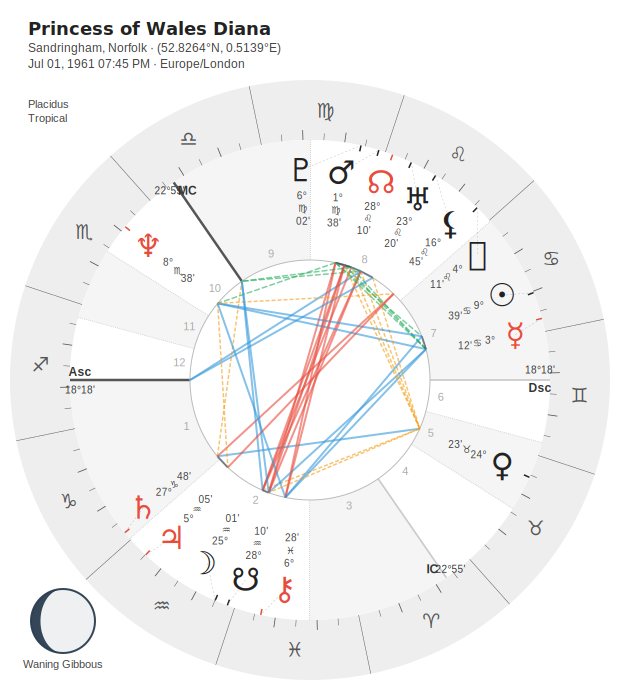

In [15]:
chart = ChartBuilder.from_notable("Princess of Wales Diana").with_aspects().calculate()

# Moon phase with label
output = OUTPUT_DIR / "09_moon_labeled.svg"
chart.draw(str(output)).with_moon_phase(position="bottom-left", show_label=True).save()

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 10: Multiple Info Corners

Combine chart info, moon phase, aspect counts, and element/modality tables.

Saved: charts/10_all_corners.svg


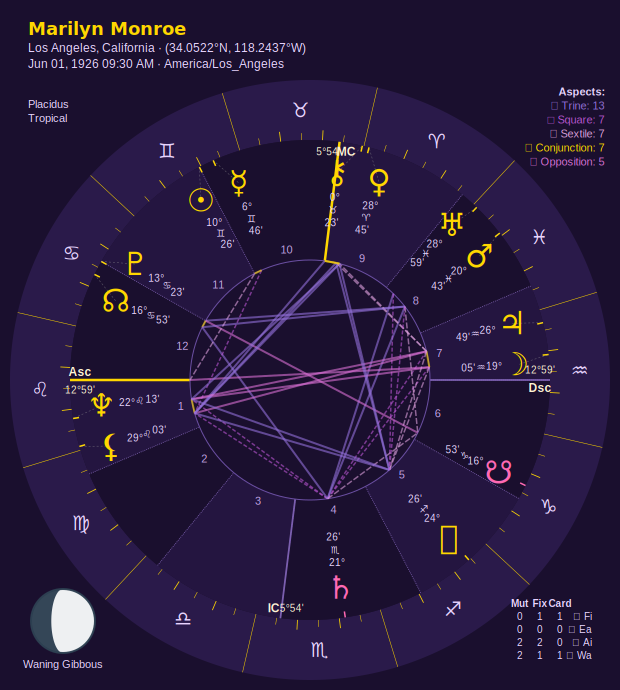

In [16]:
chart = ChartBuilder.from_notable("Marilyn Monroe").with_aspects().calculate()

output = OUTPUT_DIR / "10_all_corners.svg"
(
    chart.draw(str(output))
    .with_theme("celestial")
    .with_chart_info(position="top-left")
    .with_moon_phase(position="bottom-left", show_label=True)
    .with_aspect_counts(position="top-right")
    .with_element_modality_table(position="bottom-right")
    .save()
)

print(f"Saved: {output}")
SVG(filename=str(output))

---

## Part 5: Multiple House Systems

Display more than one house system on the same chart - useful for comparing Placidus vs Whole Sign, for example.

### Example 11: Two House Systems

The primary system is shown with solid lines, secondary systems with dashed lines.

Saved: charts/11_multi_house.svg
Primary system shown solid, secondary shown dashed.


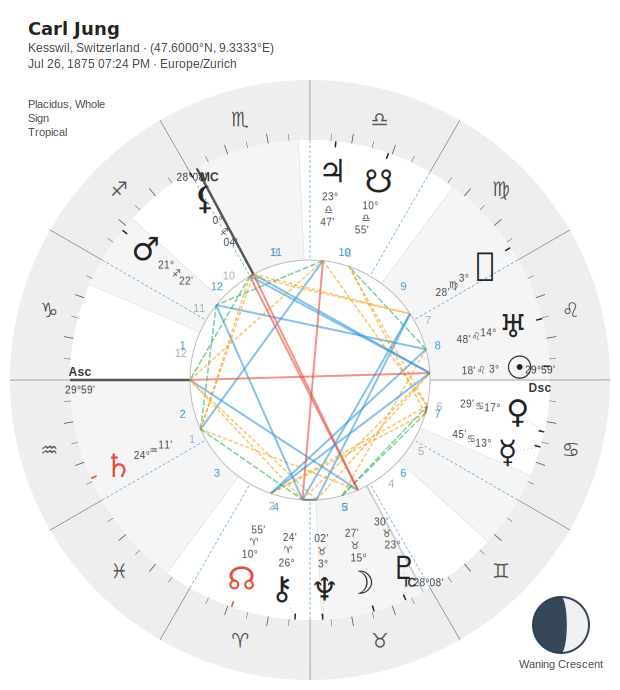

In [17]:
chart = (
    ChartBuilder.from_notable("Carl Jung")
    .with_house_systems([PlacidusHouses(), WholeSignHouses()])
    .with_aspects()
    .calculate()
)

# Show all house systems
output = OUTPUT_DIR / "11_multi_house.svg"
chart.draw(str(output)).with_house_systems("all").save()

print(f"Saved: {output}")
print("Primary system shown solid, secondary shown dashed.")
SVG(filename=str(output))

### Example 12: Three House Systems

You can show even more house systems - each gets a distinct color.

Saved: charts/12_three_houses.svg


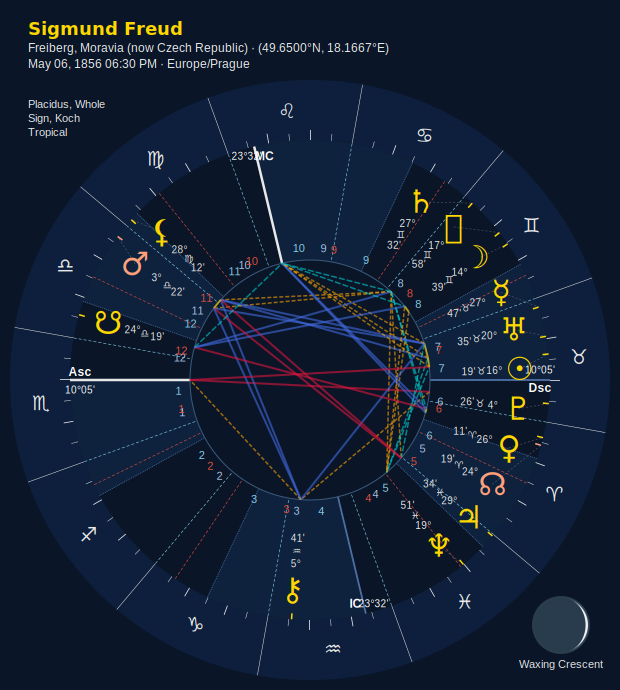

In [18]:
chart = (
    ChartBuilder.from_notable("Sigmund Freud")
    .with_house_systems([PlacidusHouses(), WholeSignHouses(), KochHouses()])
    .with_aspects()
    .calculate()
)

output = OUTPUT_DIR / "12_three_houses.svg"
chart.draw(str(output)).with_house_systems("all").with_theme("midnight").save()

print(f"Saved: {output}")
SVG(filename=str(output))

---

## Part 6: Tables (Extended Charts)

Add position tables and aspectarian grids to your chart for detailed reference.

### Example 13: Tables on the Right

Position and aspectarian tables displayed to the right of the wheel.

Saved: charts/13_tables_right.svg


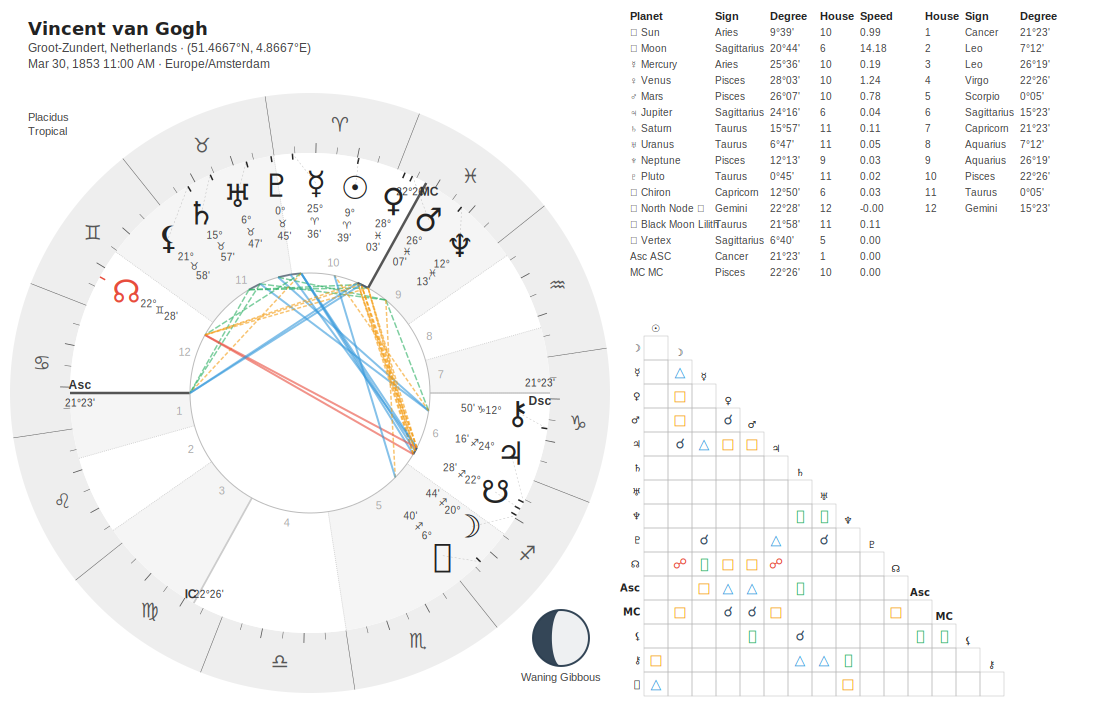

In [19]:
chart = ChartBuilder.from_notable("Vincent van Gogh").with_aspects().calculate()

output = OUTPUT_DIR / "13_tables_right.svg"
chart.draw(str(output)).with_tables("right").save()

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 14: Tables on the Left

Saved: charts/14_tables_left.svg


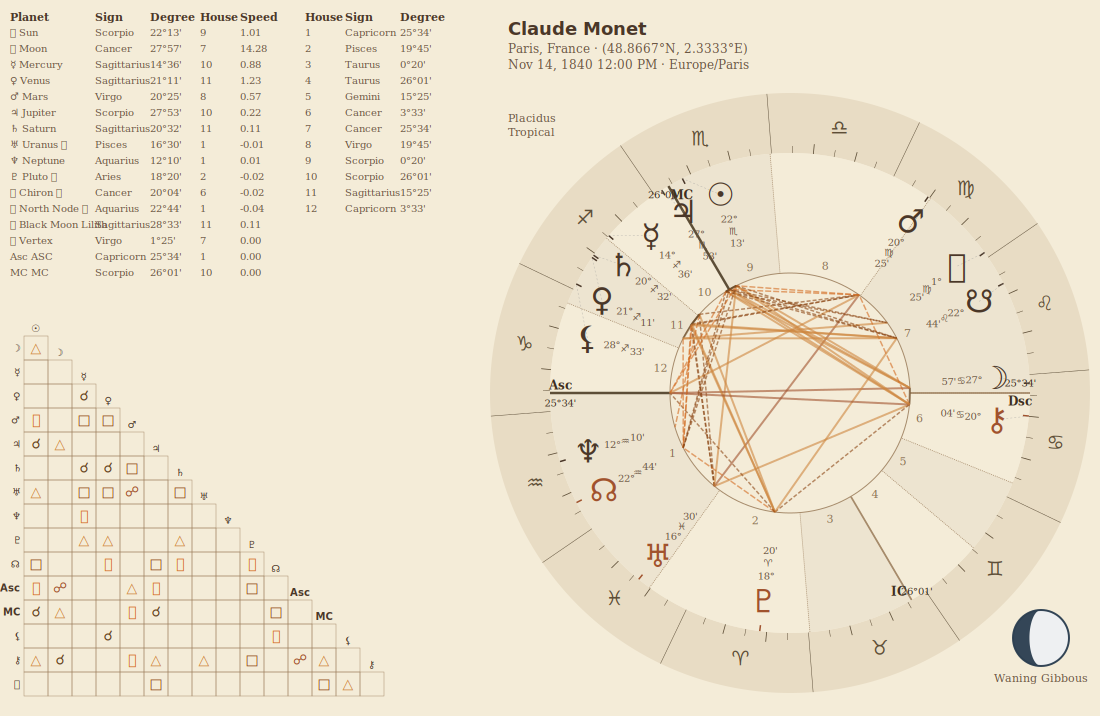

In [20]:
chart = ChartBuilder.from_notable("Claude Monet").with_aspects().calculate()

output = OUTPUT_DIR / "14_tables_left.svg"
chart.draw(str(output)).with_tables("left").with_theme("sepia").save()

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 15: Tables Below

Saved: charts/15_tables_below.svg


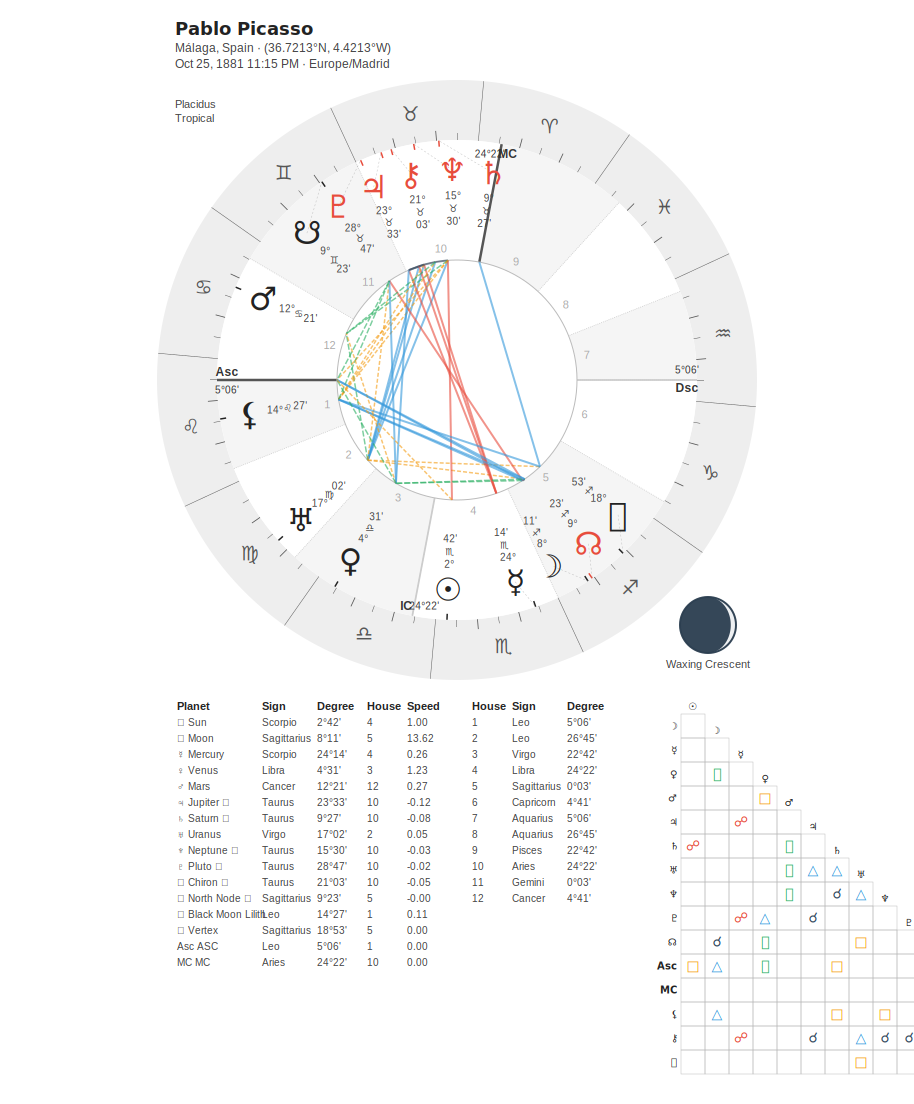

In [21]:
chart = ChartBuilder.from_notable("Pablo Picasso").with_aspects().calculate()

output = OUTPUT_DIR / "15_tables_below.svg"
chart.draw(str(output)).with_tables("below").save()

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 16: Selective Tables

Choose which tables to display.

Saved: charts/16_positions_only.svg


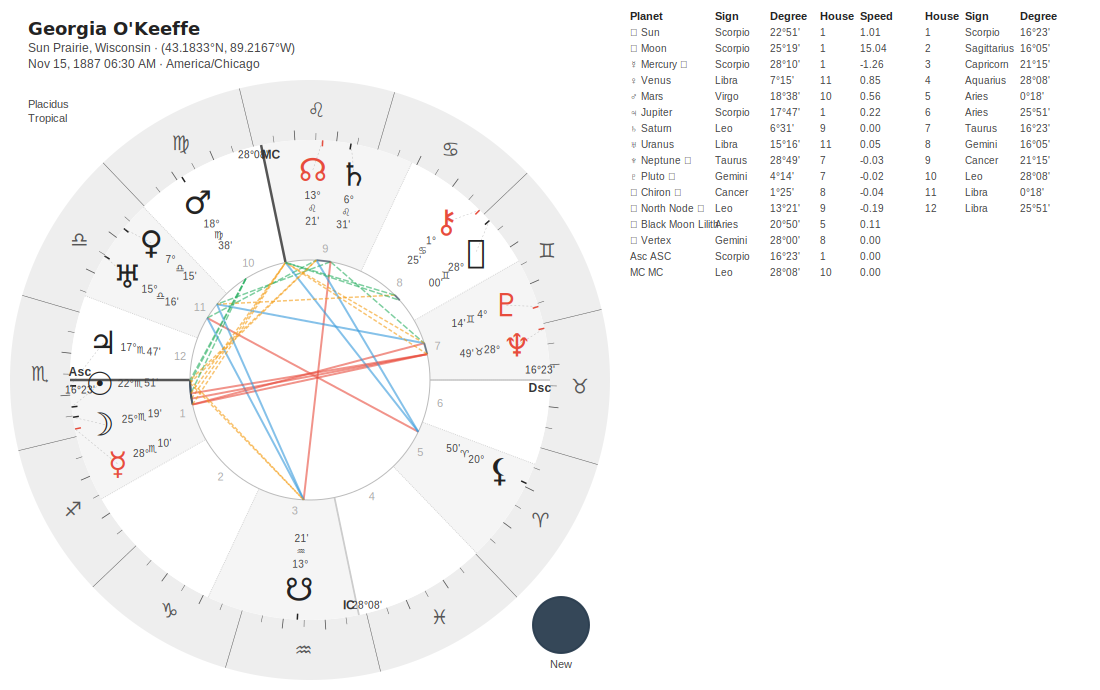

In [22]:
chart = ChartBuilder.from_notable("Georgia O'Keeffe").with_aspects().calculate()

# Only positions, no aspectarian
output = OUTPUT_DIR / "16_positions_only.svg"
chart.draw(str(output)).with_tables(show_aspectarian=False).save()

print(f"Saved: {output}")
SVG(filename=str(output))

Saved: charts/16_aspectarian_only.svg


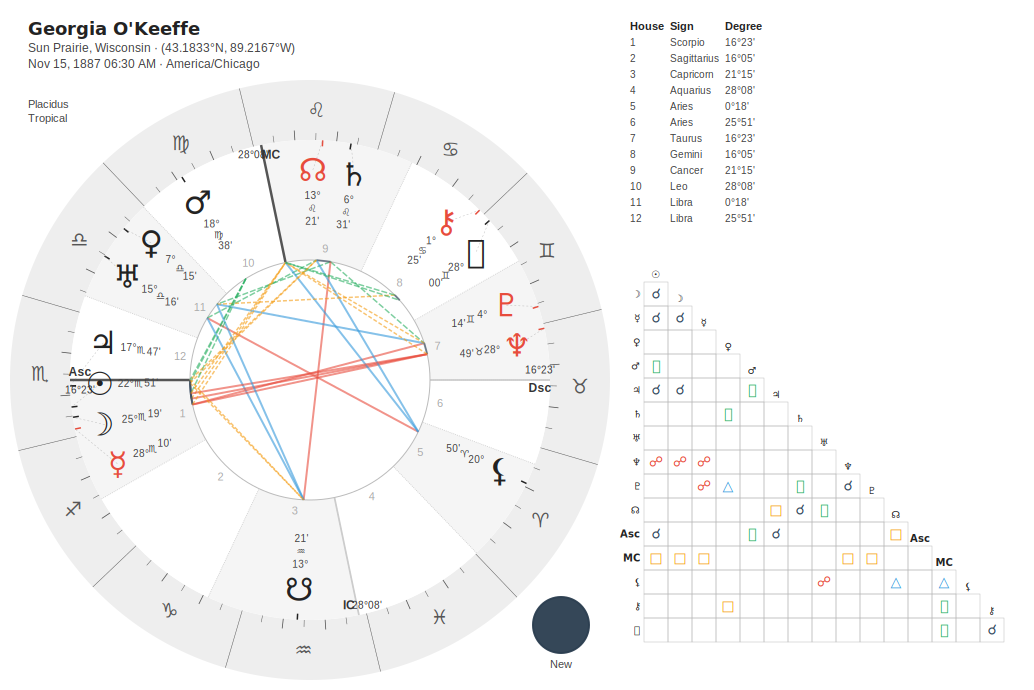

In [23]:
# Only aspectarian, no positions
output = OUTPUT_DIR / "16_aspectarian_only.svg"
chart.draw(str(output)).with_tables(show_position_table=False).save()

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 17: Detailed Aspectarian

Show orbs and applying/separating indicators in the aspectarian grid.

Saved: charts/17_detailed_aspectarian.svg


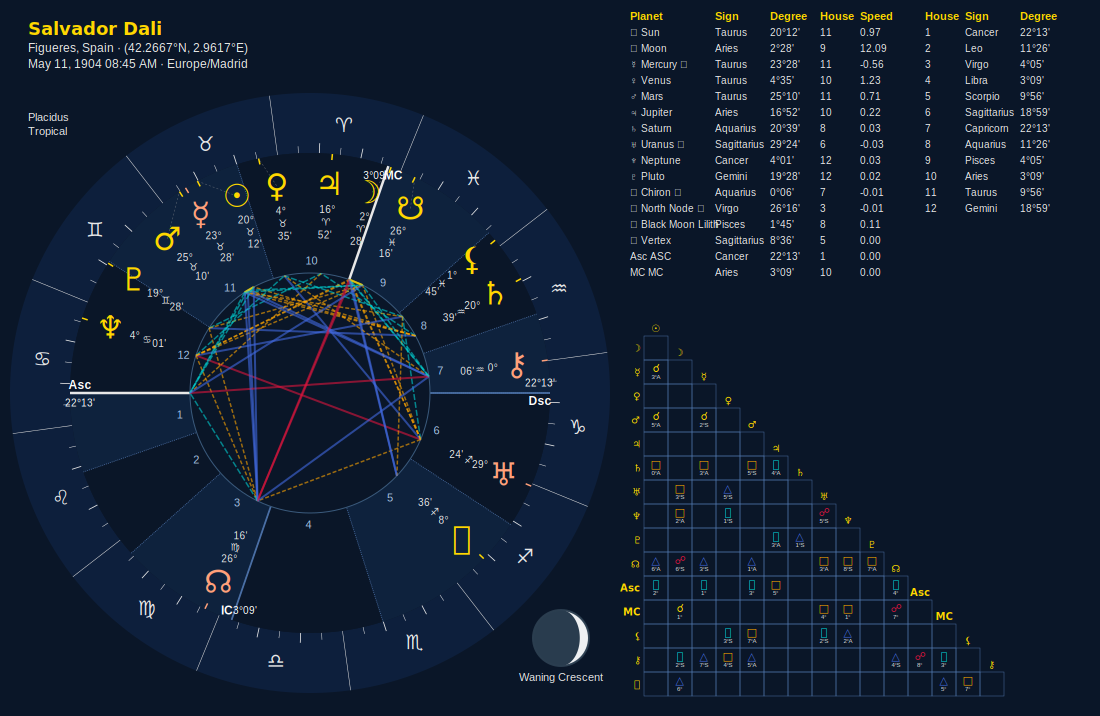

In [24]:
chart = ChartBuilder.from_notable("Salvador Dali").with_aspects().calculate()

output = OUTPUT_DIR / "17_detailed_aspectarian.svg"
chart.draw(str(output)).with_tables(aspectarian_detailed=True).with_theme(
    "midnight"
).save()

print(f"Saved: {output}")
SVG(filename=str(output))

---

## Part 7: Headers

Add a header section with the chart name and birth details.

Saved: charts/18_with_header.svg


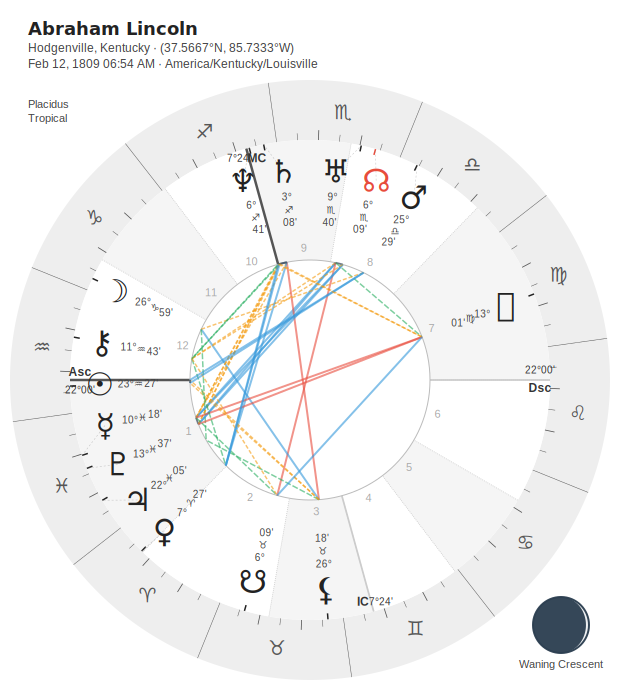

In [25]:
chart = ChartBuilder.from_notable("Abraham Lincoln").with_aspects().calculate()

output = OUTPUT_DIR / "18_with_header.svg"
chart.draw(str(output)).with_header().with_theme("classic").save()

print(f"Saved: {output}")
SVG(filename=str(output))

---

## Part 8: Full-Featured Examples

Professional, publication-ready charts combining multiple features.

### Example 19: Professional Natal Chart

Saved: charts/19_professional.svg


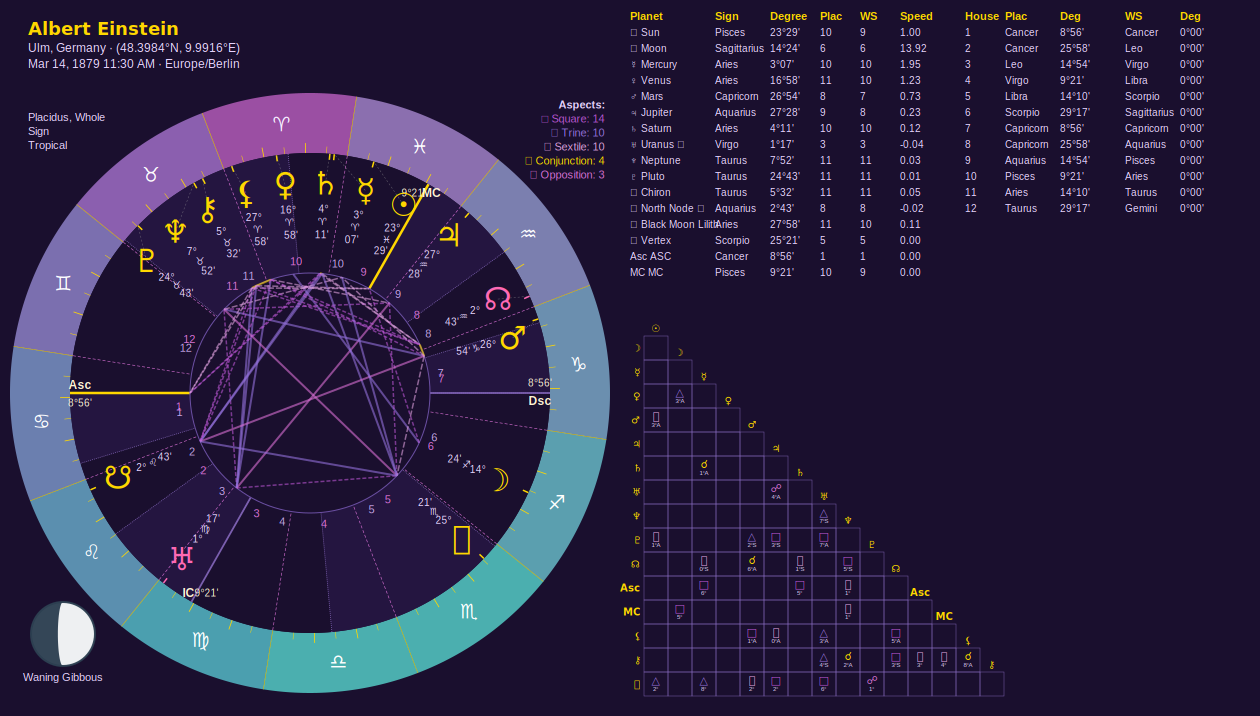

In [26]:
chart = (
    ChartBuilder.from_notable("Albert Einstein")
    .with_house_systems([PlacidusHouses(), WholeSignHouses()])
    .with_aspects()
    .calculate()
)

output = OUTPUT_DIR / "19_professional.svg"
(
    chart.draw(str(output))
    .with_theme("celestial")
    .with_zodiac_palette("rainbow_celestial")
    .with_header()
    .with_chart_info(position="top-left")
    .with_moon_phase(position="bottom-left", show_label=True)
    .with_aspect_counts(position="top-right")
    .with_house_systems("all")
    .with_tables(aspectarian_detailed=True)
    .save()
)

print(f"Saved: {output}")
SVG(filename=str(output))

### Example 20: Dark Professional Chart

Saved: charts/20_dark_professional.svg


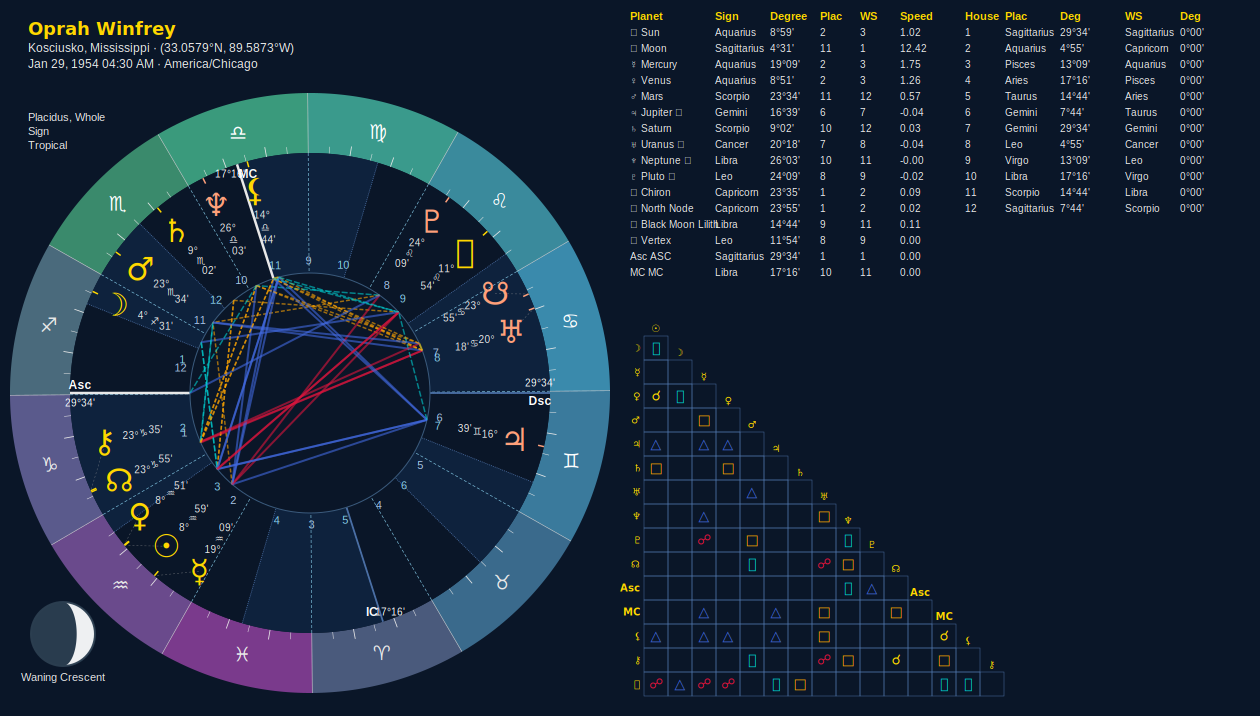

In [27]:
chart = (
    ChartBuilder.from_notable("Oprah Winfrey")
    .with_house_systems([PlacidusHouses(), WholeSignHouses()])
    .with_aspects()
    .calculate()
)

output = OUTPUT_DIR / "20_dark_professional.svg"
(
    chart.draw(str(output))
    .with_theme("midnight")
    .with_zodiac_palette("rainbow_midnight")
    .with_header()
    .with_chart_info(position="top-left")
    .with_moon_phase(position="bottom-left", show_label=True)
    .with_house_systems("all")
    .with_tables()
    .save()
)

print(f"Saved: {output}")
SVG(filename=str(output))

---

## Part 9: Batch Processing

Generate charts for multiple people at once.


Vincent van Gogh


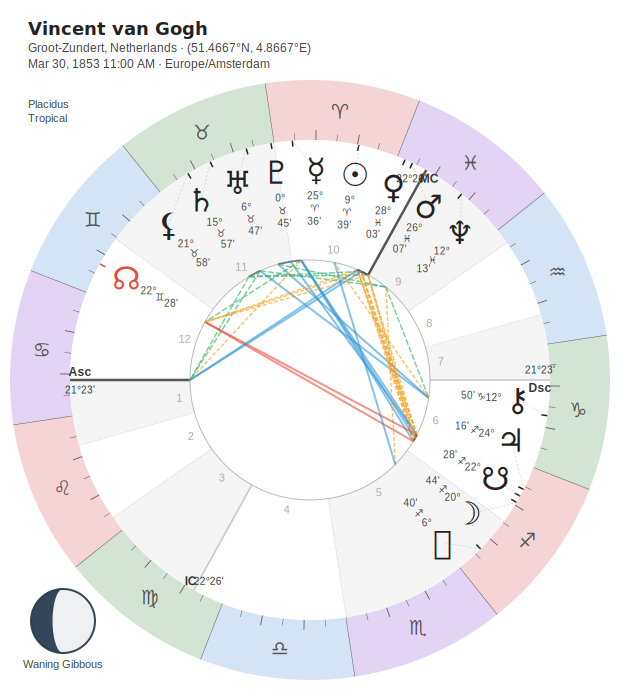


Frida Kahlo


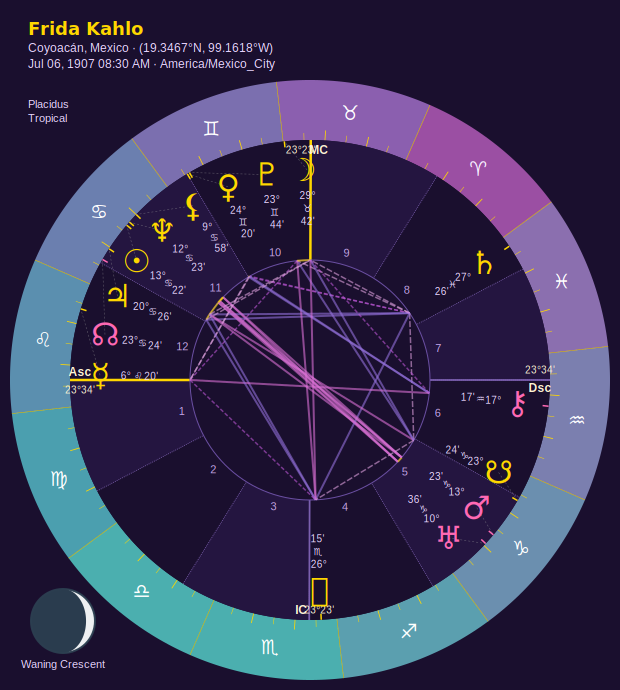


Pablo Picasso


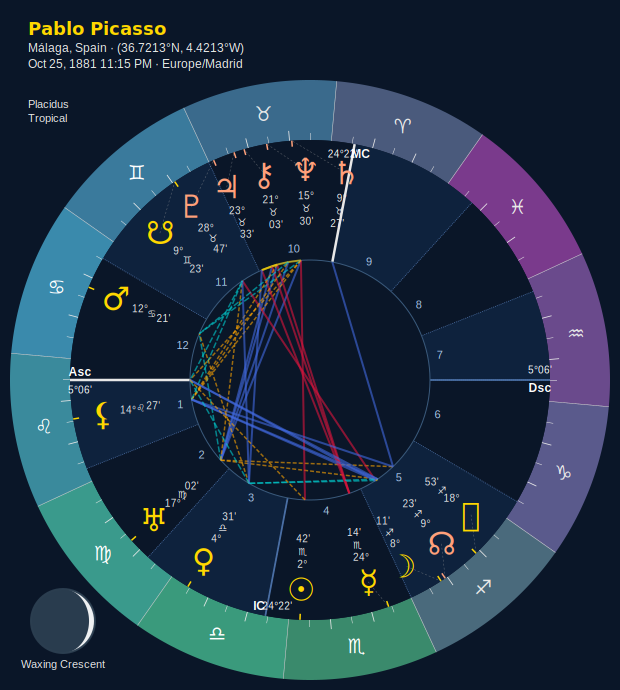

In [28]:
artists = [
    ("Vincent van Gogh", "classic", "elemental"),
    ("Frida Kahlo", "celestial", "rainbow_celestial"),
    ("Pablo Picasso", "midnight", "rainbow_midnight"),
]

for name, theme, palette in artists:
    chart = ChartBuilder.from_notable(name).with_aspects().calculate()

    filename = name.lower().replace(" ", "_").replace("'", "")
    output = OUTPUT_DIR / f"21_{filename}.svg"

    (
        chart.draw(str(output))
        .with_theme(theme)
        .with_zodiac_palette(palette)
        .with_chart_info(position="top-left")
        .with_moon_phase(position="bottom-left")
        .with_size(600)
        .save()
    )

    print(f"\n{name}")
    display(SVG(filename=str(output)))

---

## Summary

You've learned how to:

1. **Create basic charts** with `.draw()` and customize size with `.with_size()`
2. **Use presets** for quick configuration: `preset_minimal()`, `preset_standard()`, `preset_detailed()`
3. **Apply themes** with `.with_theme()` (classic, dark, midnight, celestial, neon, sepia, pastel, viridis, plasma, etc.)
4. **Customize zodiac colors** with `.with_zodiac_palette()` (grey, rainbow, elemental, cardinality)
5. **Add info corners** with `.with_chart_info()`, `.with_moon_phase()`, `.with_aspect_counts()`, `.with_element_modality_table()`
6. **Display multiple house systems** with `.with_house_systems("all")`
7. **Add tables** with `.with_tables()` (position/aspectarian)
8. **Add headers** with `.with_header()`

All generated charts have been saved to the `charts/` directory.

For more details, see the full documentation in `docs/VISUALIZATION.md`.